In [73]:
import pandas as pd
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
import BRKGA as brkga

In [74]:
dem = pd.read_csv("Instances/DemographicData.csv",index_col=0)
dem = dem.reindex(index = sorted(dem.index))

In [75]:
prox = pd.read_csv("Instances/Neighboorhood.csv",dtype=int, index_col=0)
prox.columns = prox.columns.to_numpy(int)
prox = prox.reindex(index = sorted(prox.index), columns=sorted(prox.columns))

In [76]:
params = pd.read_csv("Input/Parameters.csv", index_col=0,dtype={"N":int,"M":int,"P":int,"Elite":int,"Mutant":int,
                                                                "K":int, "S":int,"Type":bool})

In [125]:
_relation = pd.read_csv("Input/Facilities.csv",index_col=0)

facilities_cost = []
facilities_cover = []

for i in _relation["Cost"].values:
    facilities_cost.append(i)

for i in _relation["Cover"].values:
    facilities_cover.append(i)

facilities_cost = _relation["Cost"].values
facilities_cover = _relation["Cover"].values

In [115]:
for i in range(0,params["N"]["Value"]):
    facilities_cover[i]= facilities_cover[i]/dem["Urban Density (People/Km2)"][i]*_relation["City"].value_counts()[_relation["City"][i]]
    facilities_cost[i] = facilities_cost[i]*_relation["City"].value_counts()[_relation["City"][i]]/dem["Urban Density (People/Km2)"][i]

In [116]:
Heuristic = brkga.BRKGA(facilities_cover,facilities_cost,
                        params["M"]["Value"],params["P"]["Value"],
                        params["Elite"]["Value"],params["Mutant"]["Value"],
                        params["K"]["Value"],params["Type"]["Value"])

In [117]:
solutions, facilities = Heuristic.Solve()

In [118]:
best_solutions = Heuristic.getObjectiveEvolution()

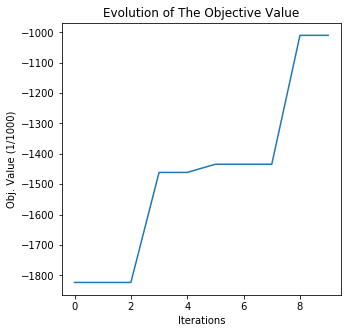

In [119]:
Fig = plt.figure(figsize=(5,5),)
plt.plot(range(0,params["K"]["Value"]),pd.Series(best_solutions),figure=Fig)
plt.xlabel("Iterations")
plt.ylabel("Obj. Value (1/1000)")
plt.title("Evolution of The Objective Value")
Fig.savefig("Exit/Evolution"+str(params["S"]["Value"])+".png")

In [132]:
exit_data = pd.DataFrame(facilities)
exit_data["obj_value"] = solutions
exit_data["final_cost"] = 0
exit_data["final_cover"] = 0

for i in exit_data.index:
    cover = 0
    cost = 0
    for j in exit_data.loc[i][:params["M"]["Value"]]:
        cost += _relation["Cost"][j]
        cover += _relation["Cover"][j]
        
    exit_data.loc[i]["final_cost"] = cost
    exit_data.loc[i]["final_cover"] = cover
    
exit_data = exit_data.sort_values("obj_value",ascending=False)    
exit_data.to_csv("Exit/Solution"+str(params["S"]["Value"])+".csv")